### 1 - Import test data

In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
from backtesting import Strategy
from backtesting import Backtest
from sklearn.model_selection import ParameterGrid

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def getYFinanceData(ticker, period, interval):
  dataF = yf.download(ticker, period=period, interval=interval)

  dataF.iloc[:,:]
  #dataF.Open.iloc

  df = pd.DataFrame(dataF)

  # use df index, convert DateTime to  a column instead of index
  df.reset_index(inplace=True)

  # delete Adj Close
  df = df.drop(['Adj Close'], axis=1)

  # rename Datetime to "Gmt time"
  df = df.rename(columns={'Datetime':'Gmt time'})
  
  # rename Date to "Gmt time"
  df = df.rename(columns={'Date':'Gmt time'})

  df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%d.%m.%Y %H:%M:%S')
  df.set_index("Gmt time", inplace=True)
  df=df[df.High!=df.Low]

  return df

In [23]:
import pandas as pd
import pandas_ta as ta

# df = pd.read_csv("EURUSD_Candlestick_5_M_BID_01.02.2023-17.02.2024.csv")
# df = getYFinanceData("GC=F", "60d", "15m")
df = getYFinanceData("EURUSD=X", "60d", "15m")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Gmt time,,,,,
2024-01-15 00:00:00,145.145996,145.233002,145.106003,145.151993,0
2024-01-15 00:15:00,145.151001,145.231003,145.128006,145.171005,0
2024-01-15 00:30:00,145.173004,145.184006,145.050003,145.076004,0
2024-01-15 00:45:00,145.074997,145.119995,144.983994,145.056000,0
2024-01-15 01:00:00,145.057999,145.169006,145.007996,145.136002,0
...,...,...,...,...,...
2024-04-05 21:00:00,151.645004,151.647003,151.623993,151.626007,0
2024-04-05 21:15:00,151.626999,151.639999,151.615005,151.623993,0
2024-04-05 21:30:00,151.621994,151.630997,151.598999,151.623001,0


In [24]:
df["EMA_slow"]=ta.ema(df.Close, length=50)
df["EMA_fast"]=ta.ema(df.Close, length=30)
df['RSI']=ta.rsi(df.Close, length=10)
my_bbands = ta.bbands(df.Close, length=15, std=1.5)
df['ATR']=ta.atr(df.High, df.Low, df.Close, length=7)
df=df.join(my_bbands)
df

,Open,High,Low,Close,Volume,EMA_slow,EMA_fast,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5
Gmt time,,,,,,,,,,,,,,
2024-01-15 00:00:00,145.145996,145.233002,145.106003,145.151993,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-15 00:15:00,145.151001,145.231003,145.128006,145.171005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-15 00:30:00,145.173004,145.184006,145.050003,145.076004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-15 00:45:00,145.074997,145.119995,144.983994,145.056000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-15 01:00:00,145.057999,145.169006,145.007996,145.136002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05 21:00:00,151.645004,151.647003,151.623993,151.626007,0,151.511597,151.557908,59.717197,0.042972,151.544158,151.588201,151.632244,0.058108,0.929200
2024-04-05 21:15:00,151.626999,151.639999,151.615005,151.623993,0,151.516005,151.562171,59.154513,0.040404,151.544358,151.590400,151.636442,0.060745,0.864806
2024-04-05 21:30:00,151.621994,151.630997,151.598999,151.623001,0,151.520201,151.566096,58.851112,0.039203,151.546477,151.593600,151.640724,0.062171,0.811952


In [25]:
# def ema_signal(df, current_candle, backcandles):
#     df_slice = df.reset_index().copy()
#     # Get the range of candles to consider
#     start = max(0, current_candle - backcandles)
#     end = current_candle
#     relevant_rows = df_slice.iloc[start:end]

#     # Check if all EMA_fast values are below EMA_slow values
#     if all(relevant_rows["EMA_fast"] < relevant_rows["EMA_slow"]):
#         return 1
#     elif all(relevant_rows["EMA_fast"] > relevant_rows["EMA_slow"]):
#         return 2
#     else:
#         return 0


# df = df[-40000:-1]
# df.reset_index(inplace=True, drop=True)
# from tqdm import tqdm
# tqdm.pandas()
# df['EMASignal'] = df.progress_apply(lambda row: ema_signal(df, row.name, 7) if row.name >= 20 else 0, axis=1)


#--------------------------------------------------------------------------------------------------------------------
def ema_signal(df, backcandles):
    # Create boolean Series for conditions
    above = df['EMA_fast'] > df['EMA_slow']
    below = df['EMA_fast'] < df['EMA_slow']

    # Rolling window to check if condition is met consistently over the window
    above_all = above.rolling(window=backcandles).apply(lambda x: x.all(), raw=True).fillna(0).astype(bool)
    below_all = below.rolling(window=backcandles).apply(lambda x: x.all(), raw=True).fillna(0).astype(bool)

    # Assign signals based on conditions
    df['EMASignal'] = 0  # Default no signal
    df.loc[above_all, 'EMASignal'] = 2  # Signal 2 where EMA_fast consistently above EMA_slow
    df.loc[below_all, 'EMASignal'] = 1  # Signal 1 where EMA_fast consistently below EMA_slow

    return df

df = df[-60000:]
# df.reset_index(inplace=True, drop=True)
df = ema_signal(df,  7)
#--------------------------------------------------------------------------------------------------------------------


/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_73092/2197725869.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# def total_signal(df, current_candle, backcandles):
#     if (ema_signal(df, current_candle, backcandles)==2
#         and (df.Open[current_candle]<=df['BBL_15_1.5'][current_candle] or df.Close[current_candle]<=df['BBL_15_1.5'][current_candle])
#         ):
#             return 2
#     if (ema_signal(df, current_candle, backcandles)==1
#         and (df.Open[current_candle]>=df['BBU_15_1.5'][current_candle] or df.Close[current_candle]>=df['BBU_15_1.5'][current_candle])
#         ):
    
#             return 1
#     return 0
        
# df['Total_Signal'] = df.progress_apply(lambda row: total_signal(df, row.name, 7), axis=1)

def total_signal(df):
    # Vectorized conditions for total_signal
    condition_buy = (df['EMASignal'] == 2) & (df['Close'] <= df['BBL_15_1.5'])
    condition_sell = (df['EMASignal'] == 1) & (df['Close'] >= df['BBU_15_1.5'])

    # Assigning signals based on conditions
    df['Total_Signal'] = 0  # Default no signal
    df.loc[condition_buy, 'Total_Signal'] = 2
    df.loc[condition_sell, 'Total_Signal'] = 1

total_signal(df)


/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_73092/4030472288.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df

,Open,High,Low,Close,Volume,EMA_slow,EMA_fast,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,EMASignal,Total_Signal
Gmt time,,,,,,,,,,,,,,,,
2024-01-15 00:00:00,145.145996,145.233002,145.106003,145.151993,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2024-01-15 00:15:00,145.151001,145.231003,145.128006,145.171005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2024-01-15 00:30:00,145.173004,145.184006,145.050003,145.076004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2024-01-15 00:45:00,145.074997,145.119995,144.983994,145.056000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2024-01-15 01:00:00,145.057999,145.169006,145.007996,145.136002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05 21:00:00,151.645004,151.647003,151.623993,151.626007,0,151.511597,151.557908,59.717197,0.042972,151.544158,151.588201,151.632244,0.058108,0.929200,2,0
2024-04-05 21:15:00,151.626999,151.639999,151.615005,151.623993,0,151.516005,151.562171,59.154513,0.040404,151.544358,151.590400,151.636442,0.060745,0.864806,2,0
2024-04-05 21:30:00,151.621994,151.630997,151.598999,151.623001,0,151.520201,151.566096,58.851112,0.039203,151.546477,151.593600,151.640724,0.062171,0.811952,2,0


In [28]:
import numpy as np
def calculate_rsi_signal_windowed(rsi_series):
    rsi_signal = np.zeros(len(rsi_series))
    for i in range(len(rsi_series)):
        window_start = max(0, i - 5)  # Adjusting to the correct window size
        window = rsi_series[window_start:i]  # Excludes the current value, as intended
        # Apply conditions within the window
        if not window.empty and window.gt(50.1).all():
            rsi_signal[i] = 2
        elif not window.empty and window.lt(49.9).all():
            rsi_signal[i] = 1
        # Else, it remains 0
    return rsi_signal

# Apply the function to calculate RSI_signal
df['RSI_signal'] = calculate_rsi_signal_windowed(df['RSI'])
df['TotalSignal'] = df.apply(lambda row: row['Total_Signal'] if row['Total_Signal'] == row['RSI_signal'] else 0, axis=1)
#df['TotalSignal'] = df["Total_Signal"]

/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_73092/1076427950.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_73092/1076427950.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
df

,Open,High,Low,Close,Volume,EMA_slow,EMA_fast,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,EMASignal,Total_Signal,RSI_signal,TotalSignal
Gmt time,,,,,,,,,,,,,,,,,,
2024-01-15 00:00:00,145.145996,145.233002,145.106003,145.151993,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0
2024-01-15 00:15:00,145.151001,145.231003,145.128006,145.171005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0
2024-01-15 00:30:00,145.173004,145.184006,145.050003,145.076004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0
2024-01-15 00:45:00,145.074997,145.119995,144.983994,145.056000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0
2024-01-15 01:00:00,145.057999,145.169006,145.007996,145.136002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05 21:00:00,151.645004,151.647003,151.623993,151.626007,0,151.511597,151.557908,59.717197,0.042972,151.544158,151.588201,151.632244,0.058108,0.929200,2,0,0.0,0.0
2024-04-05 21:15:00,151.626999,151.639999,151.615005,151.623993,0,151.516005,151.562171,59.154513,0.040404,151.544358,151.590400,151.636442,0.060745,0.864806,2,0,2.0,0.0
2024-04-05 21:30:00,151.621994,151.630997,151.598999,151.623001,0,151.520201,151.566096,58.851112,0.039203,151.546477,151.593600,151.640724,0.062171,0.811952,2,0,2.0,0.0


In [30]:
df.TotalSignal.value_counts()

TotalSignal
0.0    5596
2.0      34
1.0      24
Name: count, dtype: int64

In [31]:
import numpy as np
def pointpos(x):
    if x['TotalSignal']==2:
        return x['Low']-1e-4
    elif x['TotalSignal']==1:
        return x['High']+1e-4
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

/var/folders/mb/tyl8xvh9689bgk14qr31lc7r0000gn/T/ipykernel_73092/4273856290.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=100
dfpl = df[st:st+350]
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),

                go.Scatter(x=dfpl.index, y=dfpl['BBL_15_1.5'], 
                           line=dict(color='green', width=1), 
                           name="BBL"),
                go.Scatter(x=dfpl.index, y=dfpl['BBU_15_1.5'], 
                           line=dict(color='green', width=1), 
                           name="BBU"),
                go.Scatter(x=dfpl.index, y=dfpl['EMA_fast'], 
                           line=dict(color='black', width=1), 
                           name="EMA_fast"),
                go.Scatter(x=dfpl.index, y=dfpl['EMA_slow'], 
                           line=dict(color='blue', width=1), 
                           name="EMA_slow")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=8, color="MediumPurple"),
                name="entry")
fig.update_layout(width=1200, height=800)
fig.show()

In [33]:
df

,Open,High,Low,Close,Volume,EMA_slow,EMA_fast,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,EMASignal,Total_Signal,RSI_signal,TotalSignal,pointpos
Gmt time,,,,,,,,,,,,,,,,,,,
2024-01-15 00:00:00,145.145996,145.233002,145.106003,145.151993,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN
2024-01-15 00:15:00,145.151001,145.231003,145.128006,145.171005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN
2024-01-15 00:30:00,145.173004,145.184006,145.050003,145.076004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN
2024-01-15 00:45:00,145.074997,145.119995,144.983994,145.056000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN
2024-01-15 01:00:00,145.057999,145.169006,145.007996,145.136002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-05 21:00:00,151.645004,151.647003,151.623993,151.626007,0,151.511597,151.557908,59.717197,0.042972,151.544158,151.588201,151.632244,0.058108,0.929200,2,0,0.0,0.0,NaN
2024-04-05 21:15:00,151.626999,151.639999,151.615005,151.623993,0,151.516005,151.562171,59.154513,0.040404,151.544358,151.590400,151.636442,0.060745,0.864806,2,0,2.0,0.0,NaN
2024-04-05 21:30:00,151.621994,151.630997,151.598999,151.623001,0,151.520201,151.566096,58.851112,0.039203,151.546477,151.593600,151.640724,0.062171,0.811952,2,0,2.0,0.0,NaN


# Strategies

In [34]:
from backtesting import Strategy
from backtesting import Backtest

dfopt = df[:]
def SIGNAL():
    return dfopt.TotalSignal

class MyStrat(Strategy):
    mysize = 0.02
    slcoef = 1.1
    TPSLRatio = 1.5
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio
        
        for trade in self.trades:
            if trade.is_long and self.data.RSI[-1]>=80:
                trade.close()
            elif trade.is_short and self.data.RSI[-1]<=20:
                trade.close()
       
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=100000, margin=1/100)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 26)],
                    TPSLRatio=[i/10 for i in range(10, 26)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/backtesting/backtesting.py:1426: UserWarning:

For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.



Start                     2024-01-15 00:00:00
End                       2024-04-05 22:00:00
Duration                     81 days 22:00:00
Exposure Time [%]                    5.730456
Equity Final [$]                101629.525737
Equity Peak [$]                 101652.362981
Return [%]                           1.629526
Buy & Hold Return [%]                4.448441
Return (Ann.) [%]                    7.024591
Volatility (Ann.) [%]                2.380823
Sharpe Ratio                         2.950488
Sortino Ratio                        5.632978
Calmar Ratio                        10.224306
Max. Drawdown [%]                   -0.687048
Avg. Drawdown [%]                   -0.208707
Max. Drawdown Duration       20 days 02:45:00
Avg. Drawdown Duration        3 days 19:42:00
# Trades                                   52
Win Rate [%]                        48.076923
Best Trade [%]                       0.227052
Worst Trade [%]                     -0.175763
Avg. Trade [%]                    

In [35]:
stats["_strategy"]

<Strategy MyStrat(slcoef=1.0,TPSLRatio=1.4)>

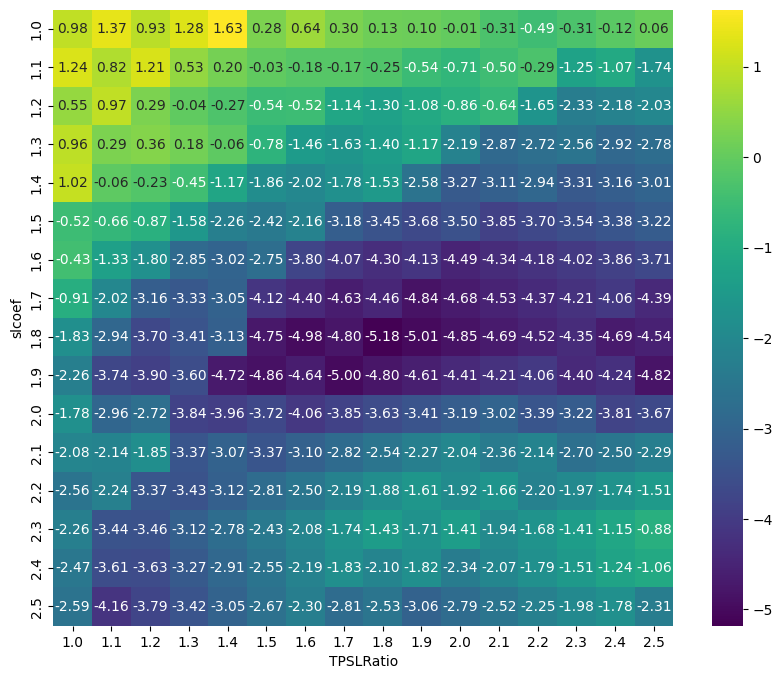

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.2f')
plt.show()

In [37]:
# find the one best parameters from heatmap_df
best_params = heatmap_df.idxmax()

# Find the maximum value over the entire DataFrame
max_value = heatmap_df.max().max()

# Find the index of the maximum value
best_params = (heatmap_df == max_value).stack().idxmax()

print(best_params)

strategy_parameters = {
  "slcoef": best_params[0],
  "tpslRatio": best_params[1]
}

(1.0, 1.4)


In [38]:
from backtesting import Strategy
from backtesting import Backtest

dftest = df[:]
def SIGNAL():
    return dftest.TotalSignal

class MyStrat(Strategy):
    mysize = 0.03
    slcoef = strategy_parameters['slcoef']
    TPSLRatio = strategy_parameters['tpslRatio']
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio
        
        for trade in self.trades:
            if trade.is_long and self.data.RSI[-1]>=80:
                trade.close()
            elif trade.is_short and self.data.RSI[-1]<=20:
                trade.close()
       
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dftest, MyStrat, cash=100000, margin=1/500)
bt.run()

Start                     2024-01-15 00:00:00
End                       2024-04-05 22:00:00
Duration                     81 days 22:00:00
Exposure Time [%]                    5.730456
Equity Final [$]                112451.056479
Equity Peak [$]                 112714.697962
Return [%]                          12.451056
Buy & Hold Return [%]                4.448441
Return (Ann.) [%]                   63.699317
Volatility (Ann.) [%]               27.413068
Sharpe Ratio                         2.323684
Sortino Ratio                        6.811377
Calmar Ratio                        12.527036
Max. Drawdown [%]                   -5.084947
Avg. Drawdown [%]                   -1.552682
Max. Drawdown Duration       20 days 02:45:00
Avg. Drawdown Duration        3 days 19:42:00
# Trades                                   52
Win Rate [%]                        48.076923
Best Trade [%]                       0.227052
Worst Trade [%]                     -0.175763
Avg. Trade [%]                    

In [39]:
bt.plot()

Row(id='3885', ...)

In [40]:
class MyStrat(Strategy):
    mysize = 0.03
    slcoef = strategy_parameters['slcoef']
    TPSLRatio = strategy_parameters['tpslRatio']
    
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio
        
        for trade in self.trades:
            if trade.is_long and self.data.RSI[-1]>=80:
                trade.close()
            elif trade.is_short and self.data.RSI[-1]<=20:
                trade.close()

        if len(self.trades)==1:
            self.trades[-1].sl = self.trades[-1].entry_price
       
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            tp2 = self.data.Close[-1] + slatr*TPSLRatio/2
            #tp2 = tp1 - slatr*TPSLRatio/2
            self.buy(sl=sl1, tp=tp1, size=self.mysize/2)
            self.buy(sl=sl1, tp=tp2, size=self.mysize/2)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            tp2 = tp1 = self.data.Close[-1] - slatr*TPSLRatio/2
            #tp2 = tp1 + slatr*TPSLRatio/2
            self.sell(sl=sl1, tp=tp1, size=self.mysize/2)
            self.sell(sl=sl1, tp=tp2, size=self.mysize/2)

bt = Backtest(dftest, MyStrat, cash=1000000, margin=1/500)
bt.run()

Start                     2024-01-15 00:00:00
End                       2024-04-05 22:00:00
Duration                     81 days 22:00:00
Exposure Time [%]                    3.183587
Equity Final [$]               1059529.099368
Equity Peak [$]                1059529.099368
Return [%]                            5.95291
Buy & Hold Return [%]                4.448441
Return (Ann.) [%]                   27.489416
Volatility (Ann.) [%]               15.456178
Sharpe Ratio                         1.778539
Sortino Ratio                        3.309777
Calmar Ratio                         5.159837
Max. Drawdown [%]                   -5.327575
Avg. Drawdown [%]                   -2.129067
Max. Drawdown Duration       43 days 20:00:00
Avg. Drawdown Duration       10 days 14:50:00
# Trades                                  104
Win Rate [%]                        57.692308
Best Trade [%]                       0.212713
Worst Trade [%]                     -0.175763
Avg. Trade [%]                    

In [41]:
bt.plot()

Row(id='5090', ...)

In [42]:
type(bt.run())

backtesting._stats._Stats